In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [189]:
import tensorflow as tf
import tensorflow_hub as hub
from  sklearn.model_selection import train_test_split
from tensorflow import keras

In [190]:
if tf.config.list_physical_devices('GPU'):
  print("YES")
else :
  print("NO")

YES


In [191]:
import os
os.getcwd()

'D:\\PERSONAL\\ML\\dog-breed'

# preparing data

In [192]:
labels_csv=pd.read_csv("labels.csv")


In [193]:
labels_csv.head()
print(len(labels_csv))

10222


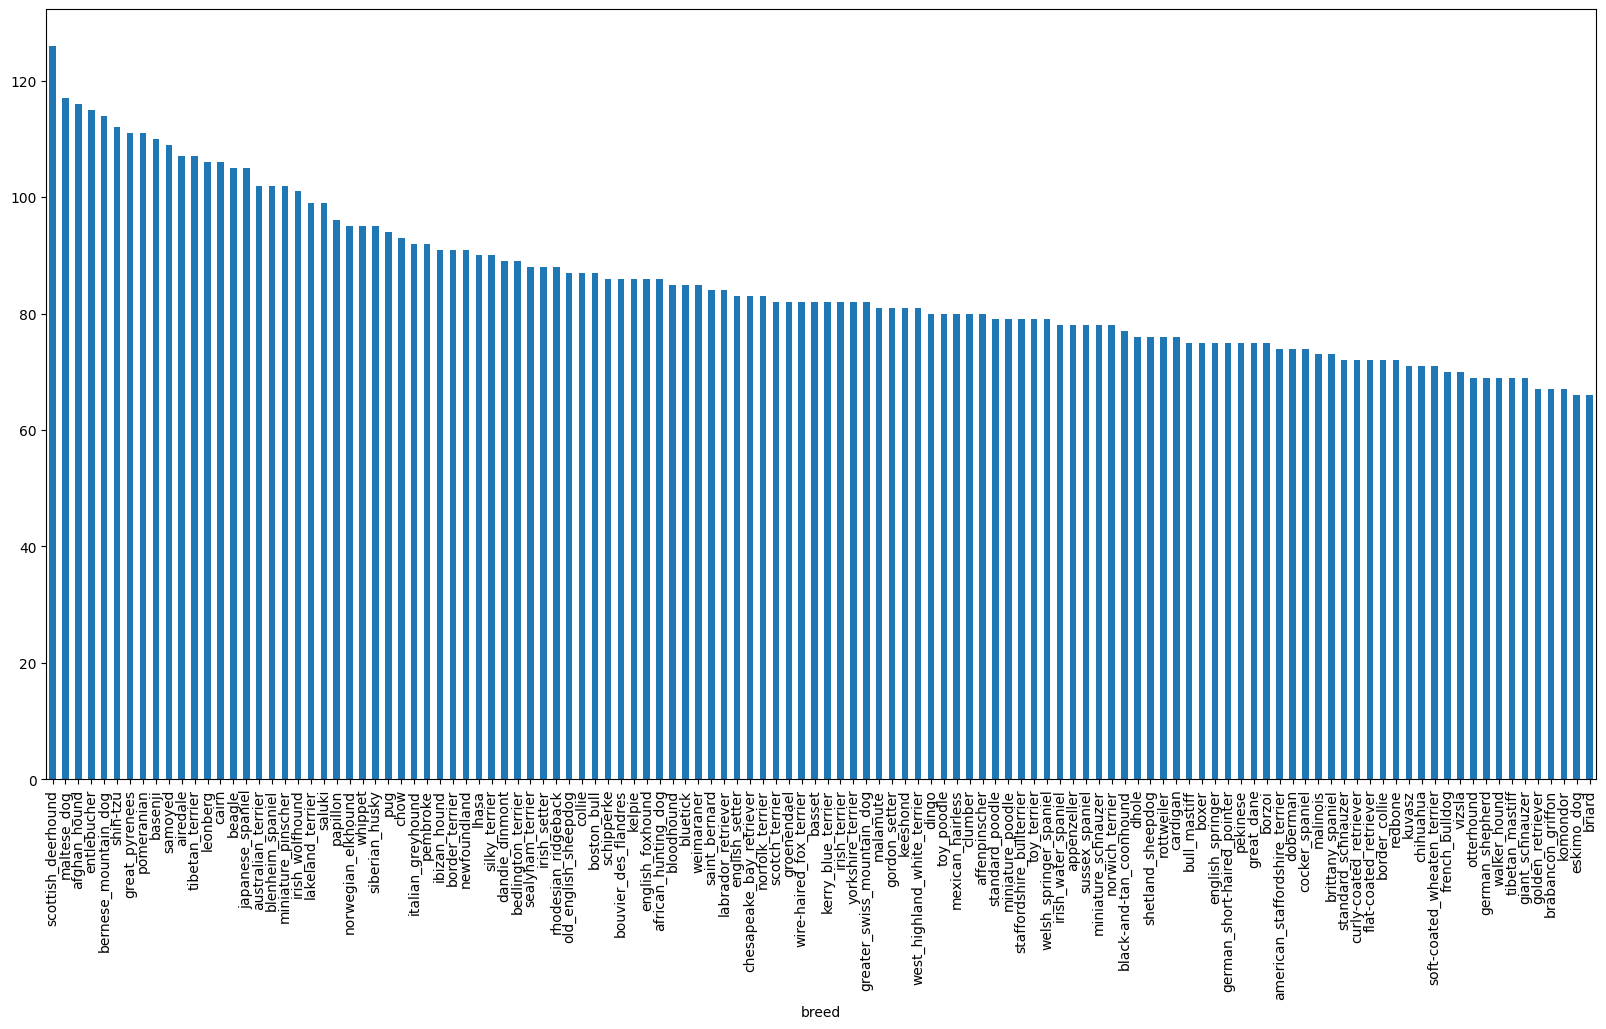

In [194]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [195]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

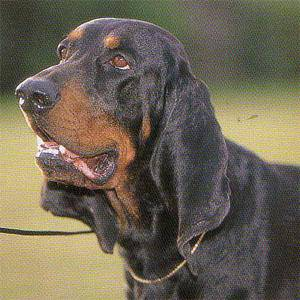

In [196]:
img = tf.keras.utils.load_img('test/0a0b97441050bba8e733506de4655ea1.jpg')
img

In [197]:
filenames = []
for filename in labels_csv['id']:
  filenames.append('train/'+filename+'.jpg')


In [198]:

len(os.listdir('train/'))

10222

In [199]:
import os
if len(os.listdir('train/')) == len(filenames):
  print("YES")
else :
  print("NO")

YES


In [200]:
len(filenames) , len(os.listdir('train/'))

(10222, 10222)

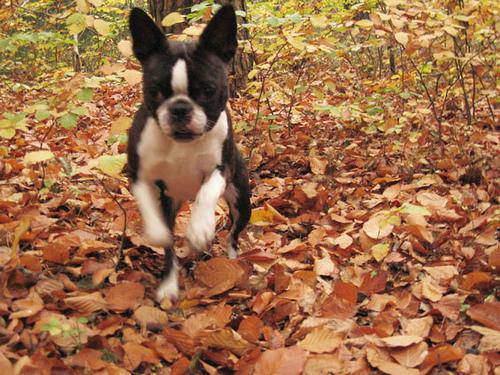

In [201]:
tf.keras.utils.load_img(filenames[0])

In [202]:
labels_csv['breed'][0]

'boston_bull'

In [203]:
labels=labels_csv['breed'].to_numpy()

In [204]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [205]:
'shetland_sheepdog' == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [206]:
boolean_labels = [label == unique_breeds for label in labels]

In [207]:
len(boolean_labels[0]) , boolean_labels[0]

(120,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]))

In [208]:
int_labels = [ label.astype(int) for label in boolean_labels]
int_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [209]:
filenames[0]

'train/000bec180eb18c7604dcecc8fe0dba07.jpg'

# spliting and preparing batches

In [210]:
NUM_IMAGES = 1000
X=filenames
y=int_labels

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [211]:
IMG_SIZE=224
def process_image(img_path,IMG_SIZE=IMG_SIZE):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img,channels = 3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  img = tf.image.resize(img, size=[IMG_SIZE, IMG_SIZE])

  return img


In [212]:
def get_image_label(file_path,label):
  img = process_image(file_path)
  return img,label

In [213]:
BATCH_SIZE=32

def get_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if valid_data:
    # validation data => dont shuffle
    print('creating validation data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  elif test_data:
    # testing data => no y and no shuffle
    print('creating testing data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch


  else:
    #training data
    print('creating training data batches')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size= len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [214]:
training_data = get_data_batches(X_train,y_train)
validation_data = get_data_batches(X_val,y_val,valid_data=True)

creating training data batches
creating validation data batches


In [215]:
training_data.element_spec, validation_data.element_spec,

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)))

In [216]:
def show_25_images(images, labels):

  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

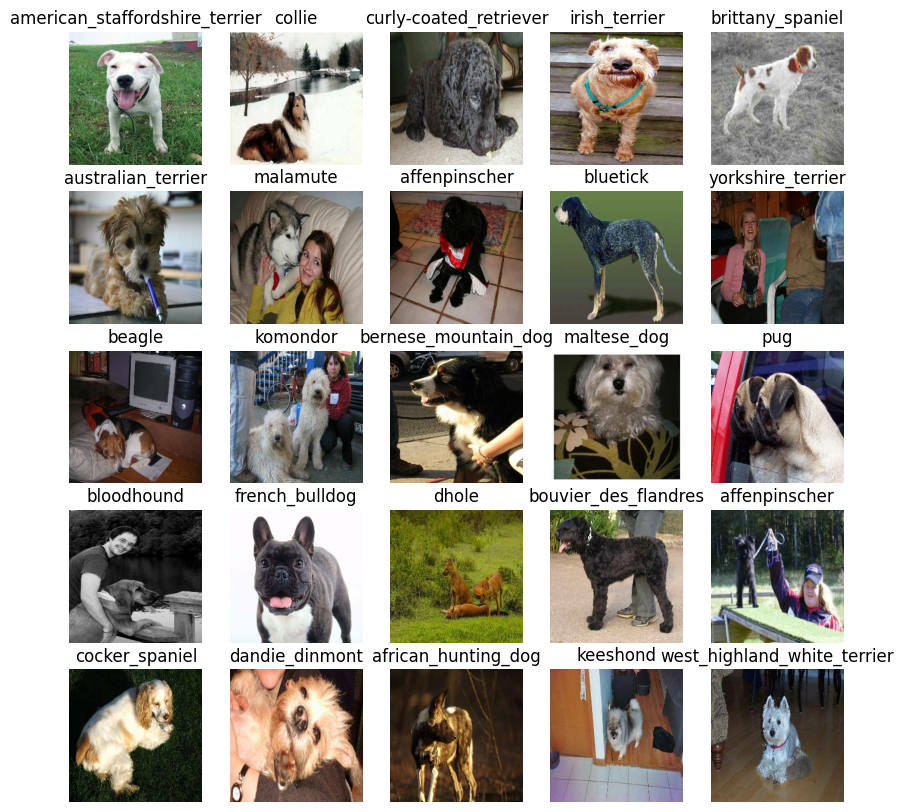

In [217]:
train_images, train_labels = next(training_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Building Model

In [218]:
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1?tfhub-redirect=true"
OUTPUT_SHAPE

120

In [219]:
#build model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  print(input_shape,output_shape)
    
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url),
      tf.keras.layers.Dense(
          units=OUTPUT_SHAPE,
          activation="softmax"
      )]
  )
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model


In [220]:
model = create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1?tfhub-redirect=true
[None, 224, 224, 3] 120


In [221]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [222]:
%load_ext tensorboard
def create_tensorflow_callback():
  log_dir = os.path.join("D:/PERSONAL/ML/dog-breed/newLogs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  return tensorboard_callback

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [223]:
%reload_ext tensorboard

In [224]:
def create_earlystoping_callback():
  callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)
  return callback

In [225]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [226]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

def train_model():
  model = create_model()

  model.fit(
      x=training_data,
      validation_data=validation_data,
      epochs=NUM_EPOCHS,
      validation_freq=1,
      callbacks=[create_tensorflow_callback(),create_earlystoping_callback()]
  )
  return model


In [227]:
model=train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1?tfhub-redirect=true
[None, 224, 224, 3] 120
Epoch 1/100
25/25 [==============================] - 8s 138ms/step - loss: 4.5429 - accuracy: 0.0988 - val_loss: 3.4655 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 3s 101ms/step - loss: 1.6263 - accuracy: 0.6888 - val_loss: 2.1596 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 2s 99ms/step - loss: 0.5610 - accuracy: 0.9325 - val_loss: 1.6526 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 2s 99ms/step - loss: 0.2551 - accuracy: 0.9875 - val_loss: 1.4788 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 2s 98ms/step - loss: 0.1467 - accuracy: 0.9987 - val_loss: 1.3961 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 2s 98ms/step - loss: 0.0995 - accuracy: 1.0000 - val_loss: 1.3578 - val_accuracy: 0

In [228]:
%tensorboard --logdir D:\\PERSONAL\\ML\\dog-breed\\newLogs

In [229]:
import os
os.getcwd()

'D:\\PERSONAL\\ML\\dog-breed'

# Making predictions

In [230]:
predictions=model.predict(validation_data,verbose=1)

7/7 [==============================] - 1s 81ms/step


In [231]:
predictions.shape

(200, 120)

In [232]:
def get_pred_label(labels):
  return unique_breeds[np.argmax(labels)]

In [233]:
get_pred_label(predictions[0])

'border_terrier'

In [234]:
def unbatchify(data):
  images=[]
  labels=[]
  for img,lab in data.unbatch().as_numpy_iterator():
    images.append(img)
    labels.append(lab)
  return images,labels

In [235]:
val_images,val_labels = unbatchify(validation_data)

In [236]:
len(val_labels)

200

In [237]:
get_pred_label(predictions[10])

'yorkshire_terrier'

In [238]:
get_pred_label(val_labels[10])

'yorkshire_terrier'

In [239]:
predictions[10]
pred_prob=np.max(predictions[10])
pred_prob

0.42647153

In [240]:
def plot_pred(prediction_probabilities,images,labels,n=0):

  pred_prob=prediction_probabilities[n]
  image=images[n]
  true_label=get_pred_label(labels[n])

  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  color="red"
  if true_label==pred_label:
    color="green"

  plt.title('{} {:2.0f}% {}'.format(pred_label,np.max(pred_prob)*100,true_label),color=color)

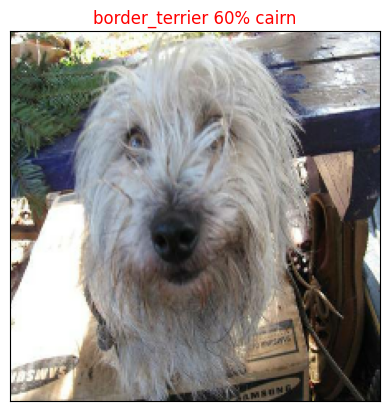

In [241]:
plot_pred(predictions,val_images,val_labels,0)

In [242]:
def plot_pred_conf(prediction_probabilities,labels,n=0):
  pred_prob=prediction_probabilities[n]
  true_label=get_pred_label(labels[n])

  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")

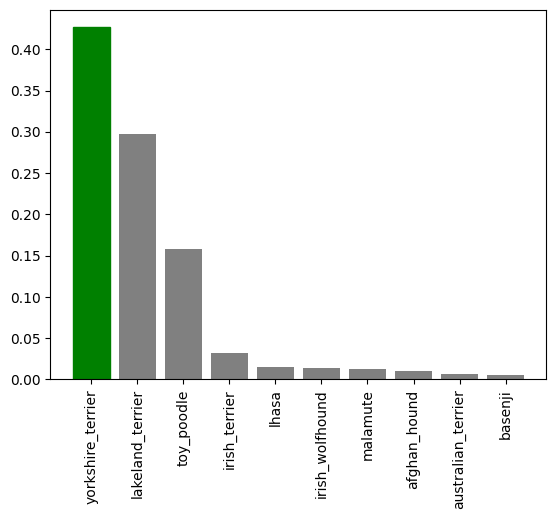

In [243]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=10)

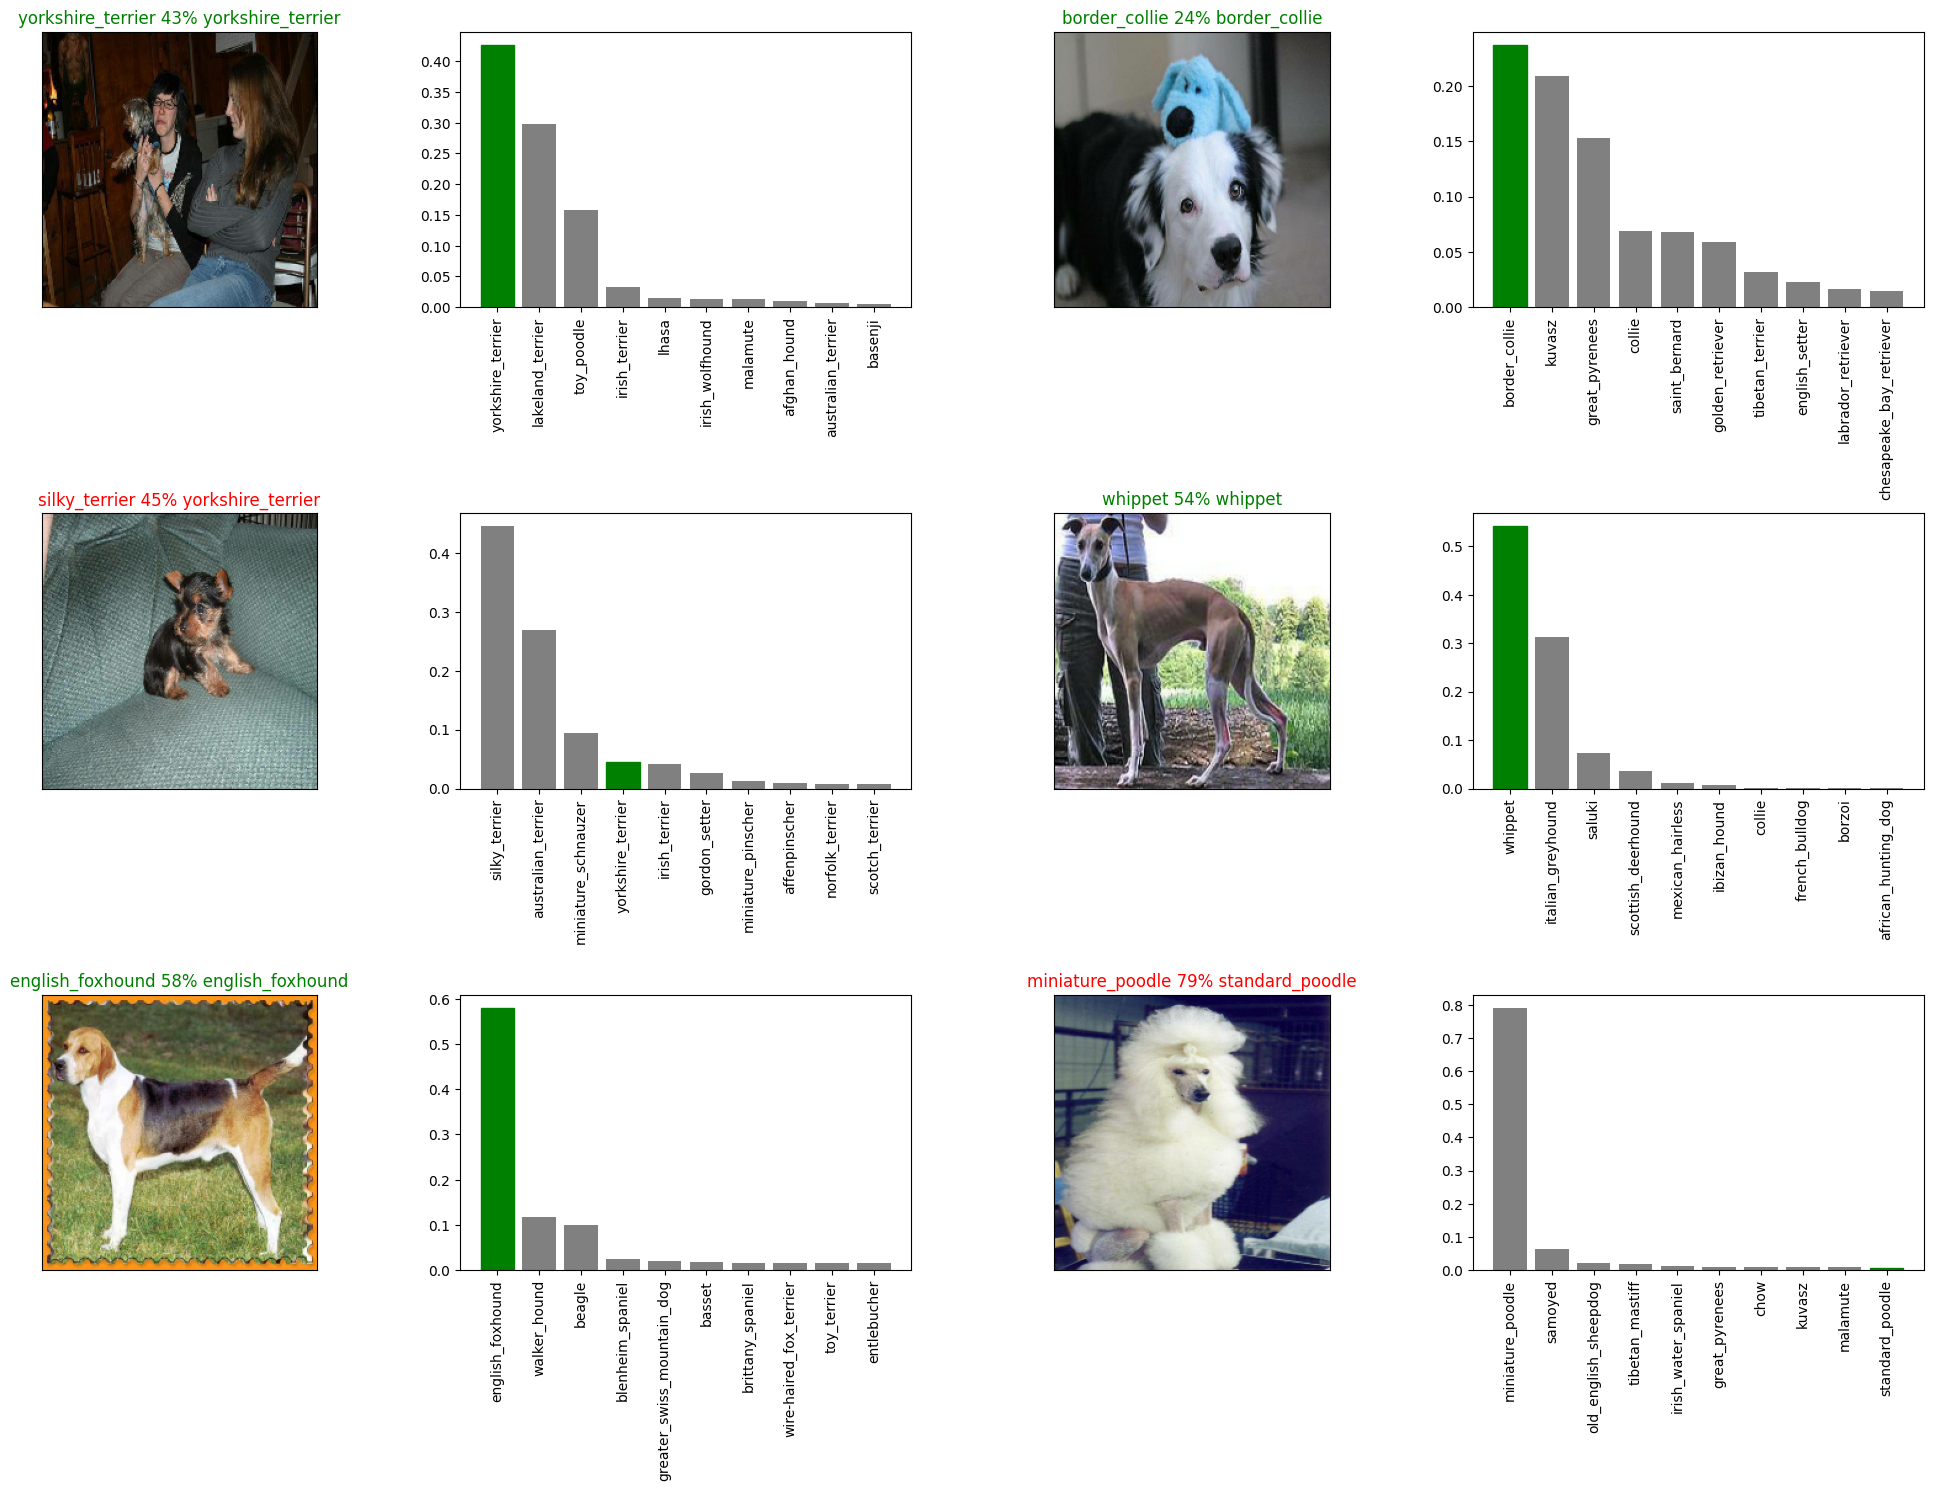

In [244]:
# Let's check a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [245]:
def save_model(model,suffix=None):
    modeldir = os.path.join('D:\\PERSONAL\\ML\\dog-breed\\models\\',datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path=modeldir+"-"+suffix+".h5"
    print(f"saving model to: {model_path} here...")
    model.save(model_path)
    return model_path


In [246]:
def load_model(model_path):
  print(f"laoding model from: {model_path} ")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

  return model

In [247]:
model_path = save_model(model,"1000_img_mobilenet_Adam")

saving model to: D:\PERSONAL\ML\dog-breed\models\20240622-113122-1000_img_mobilenet_Adam.h5 here...


In [248]:
saved_model = load_model(model_path)

laoding model from: D:\PERSONAL\ML\dog-breed\models\20240622-113122-1000_img_mobilenet_Adam.h5 


In [249]:
model.evaluate(validation_data)

7/7 [==============================] - 1s 66ms/step - loss: 1.2340 - accuracy: 0.6700


[1.2340493202209473, 0.6700000166893005]

In [250]:
saved_model.evaluate(validation_data)

7/7 [==============================] - 1s 66ms/step - loss: 1.2340 - accuracy: 0.6700


[1.2340493202209473, 0.6700000166893005]

# Training on 5111 imgs

In [251]:
len(X),len(y)

(10222, 10222)

In [252]:
half_data = get_data_batches(X[:5111],y[:5111])

creating training data batches


In [253]:
half_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))>

In [254]:
half_model=create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1?tfhub-redirect=true
[None, 224, 224, 3] 120


In [255]:
half_model_tensorboard = create_tensorflow_callback()
half_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [256]:
half_model.fit(x=half_data,
               epochs=NUM_EPOCHS,
               callbacks=[half_model_tensorboard,
                          half_model_early_stopping])

Epoch 1/100
160/160 [==============================] - 46s 262ms/step - loss: 1.9357 - accuracy: 0.5627
Epoch 2/100
160/160 [==============================] - 12s 73ms/step - loss: 0.4427 - accuracy: 0.8826
Epoch 3/100
160/160 [==============================] - 12s 73ms/step - loss: 0.2296 - accuracy: 0.9509
Epoch 4/100
160/160 [==============================] - 12s 73ms/step - loss: 0.1363 - accuracy: 0.9775
Epoch 5/100
160/160 [==============================] - 12s 75ms/step - loss: 0.0908 - accuracy: 0.9910
Epoch 6/100
160/160 [==============================] - 12s 73ms/step - loss: 0.0655 - accuracy: 0.9949
Epoch 7/100
160/160 [==============================] - 12s 73ms/step - loss: 0.0491 - accuracy: 0.9980
Epoch 8/100
160/160 [==============================] - 12s 75ms/step - loss: 0.0378 - accuracy: 0.9986
Epoch 9/100
160/160 [==============================] - 12s 73ms/step - loss: 0.0312 - accuracy: 0.9992
Epoch 10/100
160/160 [==============================] - 12s 73ms/step - 

In [257]:
save_model(half_model,suffix="5111-img-mobilenetv2-Adam")

saving model to: D:\PERSONAL\ML\dog-breed\models\20240622-113628-5111-img-mobilenetv2-Adam.h5 here...


'D:\\PERSONAL\\ML\\dog-breed\\models\\20240622-113628-5111-img-mobilenetv2-Adam.h5'

# Training on 5111 imgs

In [260]:
full_data = get_data_batches(X,y)

creating training data batches


In [261]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))>

In [262]:
full_model=create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1?tfhub-redirect=true
[None, 224, 224, 3] 120


In [263]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[half_model_tensorboard,
                          half_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 59s 168ms/step - loss: 1.3398 - accuracy: 0.6667
Epoch 2/100
320/320 [==============================] - 25s 76ms/step - loss: 0.4005 - accuracy: 0.8797
Epoch 3/100
320/320 [==============================] - 24s 75ms/step - loss: 0.2389 - accuracy: 0.9322
Epoch 4/100
320/320 [==============================] - 24s 76ms/step - loss: 0.1552 - accuracy: 0.9618
Epoch 5/100
320/320 [==============================] - 25s 77ms/step - loss: 0.1068 - accuracy: 0.9782
Epoch 6/100
320/320 [==============================] - 25s 77ms/step - loss: 0.0780 - accuracy: 0.9859
Epoch 7/100
320/320 [==============================] - 24s 76ms/step - loss: 0.0596 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 24s 74ms/step - loss: 0.0467 - accuracy: 0.9935
Epoch 9/100
320/320 [==============================] - 24s 75ms/step - loss: 0.0380 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 24s 75ms/step - 

In [264]:
full_data_path = save_model(full_model,suffix="FULL_DATA-img-mobilenetv2-Adam")

saving model to: D:\PERSONAL\ML\dog-breed\models\20240622-114723-FULL_DATA-img-mobilenetv2-Adam.h5 here...


# Make predictions on Test Dataset

In [272]:
loaded_full_model = load_model(full_data_path)

laoding model from: D:\PERSONAL\ML\dog-breed\models\20240622-114723-FULL_DATA-img-mobilenetv2-Adam.h5 


In [267]:
test_path = "D:\\PERSONAL\\ML\\dog-breed\\test\\"
test_filenames = [test_path+ fname for fname in os.listdir(test_path)]
test_filenames[:5]

['D:\\PERSONAL\\ML\\dog-breed\\test\\000621fb3cbb32d8935728e48679680e.jpg',
 'D:\\PERSONAL\\ML\\dog-breed\\test\\00102ee9d8eb90812350685311fe5890.jpg',
 'D:\\PERSONAL\\ML\\dog-breed\\test\\0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'D:\\PERSONAL\\ML\\dog-breed\\test\\001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'D:\\PERSONAL\\ML\\dog-breed\\test\\001a5f3114548acdefa3d4da05474c2e.jpg']

In [268]:
len(test_filenames)

10357

In [270]:
test_data = get_data_batches(test_filenames,test_data=True)

creating testing data batches


In [271]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [273]:
test_predictions = loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 32s 96ms/step


In [276]:
np.savetxt("D:\\PERSONAL\\ML\\dog-breed\\pred_array.csv",test_predictions,delimiter=",")

In [277]:
test_predcitions = np.loadtxt("D:\\PERSONAL\\ML\\dog-breed\\pred_array.csv",delimiter = ",")

In [278]:
 test_predictions[:10]

array([[1.82605233e-11, 1.02464695e-11, 1.30501621e-14, ...,
        4.52208529e-14, 1.75879325e-10, 8.96649595e-12],
       [1.68799079e-06, 4.11868456e-07, 3.21008748e-08, ...,
        3.05866270e-11, 1.52491509e-07, 1.88462645e-09],
       [1.56540766e-10, 9.90789658e-07, 1.91620853e-09, ...,
        4.06246947e-08, 3.01933513e-11, 5.75715413e-11],
       ...,
       [5.06833964e-10, 1.04014722e-11, 3.12369158e-11, ...,
        2.25016273e-12, 1.11263928e-12, 5.47257482e-11],
       [1.17137307e-11, 2.48432386e-10, 1.05046929e-10, ...,
        1.77857004e-07, 6.54848065e-10, 8.50163429e-12],
       [1.16231291e-09, 3.47735625e-11, 1.98666708e-10, ...,
        1.85439793e-12, 2.43310233e-11, 2.26503900e-07]], dtype=float32)

In [279]:
test_predictions.shape

(10357, 120)

In [298]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))

In [299]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [300]:
preds_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [301]:
preds_df["id"]=test_ids

In [302]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [303]:
preds_df[list(unique_breeds)] = test_predictions

In [304]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.826052e-11  1.024647e-11   
1  00102ee9d8eb90812350685311fe5890   1.687991e-06  4.118685e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   1.565408e-10  9.907897e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   2.191286e-06  1.121599e-06   
4  001a5f3114548acdefa3d4da05474c2e   5.153022e-05  3.015230e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.305016e-14  1.643427e-14                    1.512700e-13   
1         3.210087e-08  2.103697e-09                    6.970158e-07   
2         1.916209e-09  3.559913e-11                    1.713192e-10   
3         3.440983e-07  4.457303e-06                    5.051935e-05   
4         1.258494e-09  6.163245e-10                    2.308958e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  9.639924e-12        9.588170e-17  7.196785e-13  1.083514e-13  ...   
1  3.694983e-09        9.206454e-07  1.811760e-06  3.688984e-09  ...   
2  3.799383e-09        7.692716e-12  2.465262e-12  4.749621e-10  ...   
3  1.519392e-06        4.615165e-11  2.335007e-09  1.232133e-07  ...   
4  2.833623e-12        1.193526e-10  9.939383e-10  1.828014e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  5.485855e-13  7.103595e-14  3.982006e-14  1.041339e-14  6.705461e-15   
1  5.019348e-09  4.029577e-07  1.138150e-08  3.630100e-06  6.367325e-08   
2  4.979521e-12  1.249371e-11  1.800243e-08  2.067549e-06  2.142638e-08   
3  1.295170e-06  1.927329e-10  2.158725e-06  3.474721e-09  2.048429e-06   
4  2.483732e-08  2.378413e-11  2.230910e-11  2.587654e-11  1.001833e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            7.580500e-13                 2.364798e-13  4.522085e-14   
1            2.629819e-07                 2.383893e-04  3.058663e-11   
2            1.166250e-08                 1.656097e-12  4.062469e-08   
3            1.123478e-08                 2.367328e-15  3.306649e-03   
4            9.465462e-11                 1.705315e-11  2.512750e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.758793e-10       8.966496e-12  
1             1.524915e-07       1.884626e-09  
2             3.019335e-11       5.757154e-11  
3             4.766082e-11       3.747954e-07  
4             9.250305e-11       1.803230e-08  

[5 rows x 121 columns]

In [306]:
preds_df.to_csv("D:\\PERSONAL\\ML\\dog-breed\\Full_model_MobilenetV2_AdamOpt.csv",index=False)

# custom Photo predictions

In [307]:
custom_path ="D:\\PERSONAL\\ML\\dog-breed\\dogs\\"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [309]:
custom_data = get_data_batches(custom_image_paths, test_data=True)

creating testing data batches


In [310]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 618ms/step


In [311]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['norwegian_elkhound']

In [312]:
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

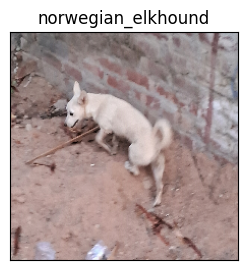

In [313]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)